In [1]:
# Import required libraries
import numpy as np
import os
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read the COvid data
file_path = Path("C:\\Users\\linet\\OneDrive\\Desktop\\Covid\\Conditition_affecting_covid.csv")

In [3]:
print(os.getcwd()) 

C:\Users\linet\OneDrive\Desktop\Covid


In [4]:
print(file_path.exists())

True


In [5]:
df_covid = pd.read_csv(file_path)
print(df_covid.shape)
df_covid.head()

(621000, 14)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,09/24/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [6]:
# Get a summary of the DataFrame
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          621000 non-null  object 
 1   Start Date          621000 non-null  object 
 2   End Date            621000 non-null  object 
 3   Group               621000 non-null  object 
 4   Year                608580 non-null  float64
 5   Month               558900 non-null  float64
 6   State               621000 non-null  object 
 7   Condition Group     621000 non-null  object 
 8   Condition           621000 non-null  object 
 9   ICD10_codes         621000 non-null  object 
 10  Age Group           621000 non-null  object 
 11  COVID-19 Deaths     437551 non-null  float64
 12  Number of Mentions  443423 non-null  float64
 13  Flag                183449 non-null  object 
dtypes: float64(4), object(10)
memory usage: 66.3+ MB


In [7]:
# Drop the specified columns
columns_to_drop = ['Year', 'Data As Of', 'Month', 'ICD10_codes', 'Flag']
df_covid_cleaned = df_covid.drop(columns=columns_to_drop)
print(df_covid_cleaned.shape)
df_covid_cleaned.head()

(621000, 9)


,Start Date,End Date,Group,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,01/01/2020,09/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,0-24,1569.0,1647.0
1,01/01/2020,09/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,25-34,5804.0,6029.0
2,01/01/2020,09/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,35-44,15080.0,15699.0
3,01/01/2020,09/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,45-54,37414.0,38878.0
4,01/01/2020,09/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,55-64,82668.0,85708.0


In [8]:
# Get a summary of the DataFrame
df_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Start Date          621000 non-null  object 
 1   End Date            621000 non-null  object 
 2   Group               621000 non-null  object 
 3   State               621000 non-null  object 
 4   Condition Group     621000 non-null  object 
 5   Condition           621000 non-null  object 
 6   Age Group           621000 non-null  object 
 7   COVID-19 Deaths     437551 non-null  float64
 8   Number of Mentions  443423 non-null  float64
dtypes: float64(2), object(7)
memory usage: 42.6+ MB


In [9]:
# Unique Values in a Column:
print(df_covid_cleaned['State'].unique())

['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'New York City'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'Puerto Rico']


In [10]:
# Unique Values in a Column:
print(df_covid_cleaned['Condition'].unique())

['Influenza and pneumonia' 'Chronic lower respiratory diseases'
 'Adult respiratory distress syndrome' 'Respiratory failure'
 'Respiratory arrest' 'Other diseases of the respiratory system'
 'Hypertensive diseases' 'Ischemic heart disease' 'Cardiac arrest'
 'Cardiac arrhythmia' 'Heart failure' 'Cerebrovascular diseases'
 'Other diseases of the circulatory system' 'Sepsis' 'Malignant neoplasms'
 'Diabetes' 'Obesity' 'Alzheimer disease'
 'Vascular and unspecified dementia' 'Renal failure'
 'Intentional and unintentional injury, poisoning, and other adverse events'
 'All other conditions and causes (residual)' 'COVID-19']


In [11]:
# Unique Values in a Column:
print(df_covid_cleaned['Condition Group'].unique())

['Respiratory diseases' 'Circulatory diseases' 'Sepsis'
 'Malignant neoplasms' 'Diabetes' 'Obesity' 'Alzheimer disease'
 'Vascular and unspecified dementia' 'Renal failure'
 'Intentional and unintentional injury, poisoning, and other adverse events'
 'All other conditions and causes (residual)' 'COVID-19']


In [12]:
# Unique Values in a Column:
print(df_covid_cleaned['Age Group'].unique())

['0-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84' '85+' 'Not stated'
 'All Ages']


In [13]:
# Drop rows with missing COVID-19 Deaths data
df_covid_cleaned = df_covid.dropna(subset=['COVID-19 Deaths']).copy()  # Create a copy to avoid SettingWithCopyWarning

# Exclude aggregated or summary entries if necessary
df_covid_filtered = df_covid_cleaned[df_covid_cleaned['Age Group'] != 'COVID-19 Deaths']

In [14]:
# Find the highest number of COVID-19 deaths
max_deaths_value = df_covid_filtered['COVID-19 Deaths'].max()

# Find the Age Group(s) with this maximum number of COVID-19 deaths
age_groups_with_max_deaths = df_covid_filtered[df_covid_filtered['COVID-19 Deaths'] == max_deaths_value]['Age Group']

print(f"The highest number of COVID-19 deaths is {max_deaths_value}.")
print(f"The Age Group(s) with this highest number of COVID-19 deaths are:")
print(age_groups_with_max_deaths.unique())

The highest number of COVID-19 deaths is 1146242.0.
The Age Group(s) with this highest number of COVID-19 deaths are:
['All Ages']


In [15]:
# Group by 'Condition' and sum the 'COVID-19 Deaths'
condition_deaths = df_covid_filtered.groupby('Condition')['COVID-19 Deaths'].sum()

# Convert the Series to a DataFrame for better readability
condition_deaths_df = condition_deaths.reset_index()
condition_deaths_df.columns = ['Condition', 'Total COVID-19 Deaths']

# Display the table
condition_deaths_df

,Condition,Total COVID-19 Deaths
0,Adult respiratory distress syndrome,1255835.0
1,All other conditions and causes (residual),5719965.0
2,Alzheimer disease,409248.0
3,COVID-19,13769328.0
4,Cardiac arrest,1602007.0
5,Cardiac arrhythmia,1097828.0
6,Cerebrovascular diseases,712488.0
7,Chronic lower respiratory diseases,1290804.0
8,Diabetes,2002675.0
9,Heart failure,1150743.0


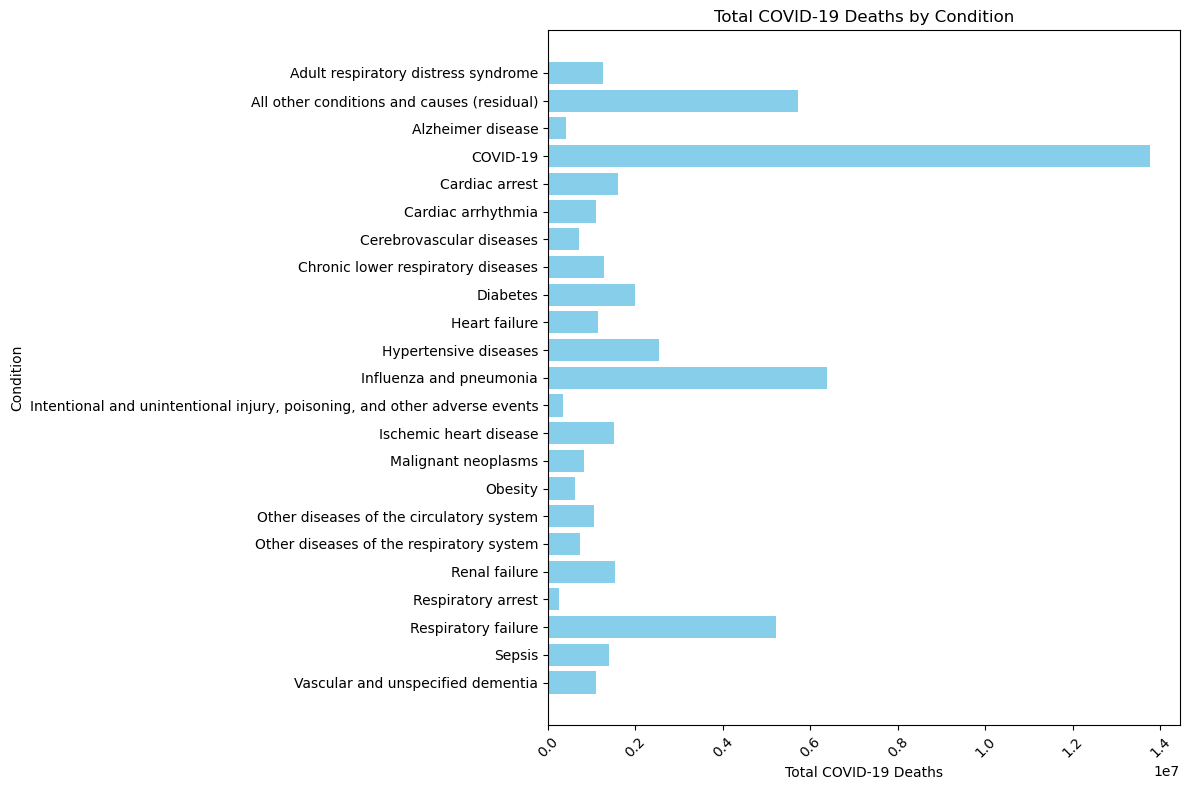

In [16]:
# Plotting condition deaths 
plt.figure(figsize=(12, 8))
plt.barh(condition_deaths_df['Condition'], condition_deaths_df['Total COVID-19 Deaths'], color='skyblue')
plt.xlabel('Total COVID-19 Deaths')
plt.ylabel('Condition')
plt.title('Total COVID-19 Deaths by Condition')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [17]:
# Convert 'Start Date' to datetime format
df_covid_cleaned['Start Date'] = pd.to_datetime(df_covid_cleaned['Start Date'])

# Ensure that 'Start Date' is used for chronological ordering
# Group by 'Start Date' and 'Condition' to sum the COVID-19 Deaths
time_condition_deaths = df_covid_cleaned.groupby(['Start Date', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

# Pivot the table to have conditions as columns for easier plotting
pivot_table = time_condition_deaths.pivot(index='Start Date', columns='Condition', values='COVID-19 Deaths')
pivot_table


Condition,Adult respiratory distress syndrome,All other conditions and causes (residual),Alzheimer disease,COVID-19,Cardiac arrest,Cardiac arrhythmia,Cerebrovascular diseases,Chronic lower respiratory diseases,Diabetes,Heart failure,...,Ischemic heart disease,Malignant neoplasms,Obesity,Other diseases of the circulatory system,Other diseases of the respiratory system,Renal failure,Respiratory arrest,Respiratory failure,Sepsis,Vascular and unspecified dementia
Start Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,593655.0,2487120.0,203725.0,6141962.0,718285.0,484429.0,323066.0,578848.0,927390.0,508655.0,...,686479.0,356460.0,273285.0,456798.0,311044.0,663074.0,125402.0,2303682.0,622158.0,543329.0
2020-02-01,2.0,8.0,0.0,38.0,2.0,0.0,2.0,6.0,10.0,0.0,...,6.0,2.0,4.0,6.0,0.0,0.0,2.0,14.0,4.0,2.0
2020-03-01,6006.0,7216.0,225.0,28040.0,3849.0,1006.0,349.0,2036.0,3703.0,1238.0,...,2389.0,920.0,722.0,1080.0,691.0,1718.0,388.0,9008.0,2259.0,866.0
2020-04-01,39196.0,75083.0,6780.0,261640.0,36399.0,13168.0,10001.0,18765.0,37325.0,14470.0,...,25201.0,9114.0,6358.0,10651.0,7395.0,18910.0,5408.0,87896.0,18428.0,26956.0
2020-05-01,17711.0,53762.0,6256.0,152812.0,16933.0,9221.0,8109.0,12839.0,22057.0,10886.0,...,15638.0,5904.0,3629.0,7884.0,4581.0,12196.0,2775.0,49796.0,13122.0,22063.0
2020-06-01,7161.0,26966.0,3009.0,71553.0,7918.0,4400.0,3811.0,5663.0,11934.0,4992.0,...,7809.0,2897.0,2435.0,3768.0,2361.0,6200.0,958.0,22597.0,6709.0,9608.0
2020-07-01,12787.0,45433.0,4338.0,124126.0,12786.0,8094.0,5414.0,11271.0,25327.0,7942.0,...,15749.0,4801.0,7155.0,6512.0,4545.0,11262.0,2034.0,40656.0,12283.0,12700.0
2020-08-01,12578.0,46057.0,4652.0,119350.0,12906.0,8153.0,5852.0,10285.0,21692.0,7948.0,...,13587.0,4491.0,5252.0,6573.0,4529.0,11934.0,2013.0,43557.0,13765.0,12523.0
2020-09-01,7412.0,30526.0,3151.0,76476.0,7737.0,5159.0,3759.0,6287.0,11644.0,5507.0,...,7855.0,3056.0,2634.0,4486.0,3270.0,7398.0,1258.0,29089.0,8596.0,7349.0


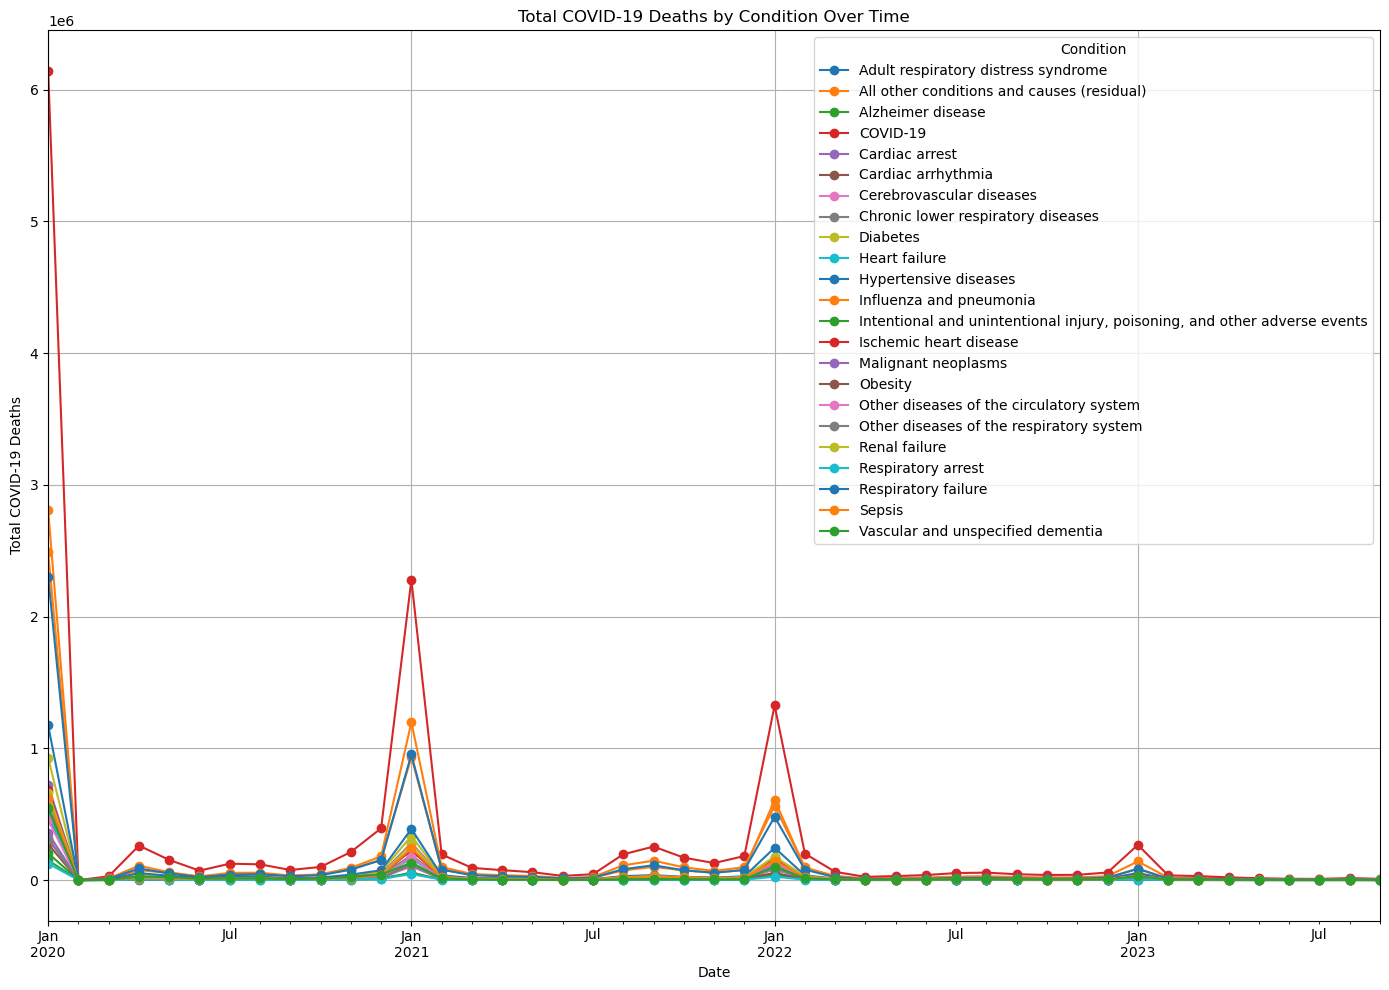

In [18]:
# Plotting using pandas built-in plot method
pivot_table.plot(figsize=(14, 10), marker='o')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Deaths')
plt.title('Total COVID-19 Deaths by Condition Over Time')
plt.legend(title='Condition')
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the labels and titles properly
plt.show()

In [19]:
# Resources 
# [conditions-contributing-deaths in COVID](https://catalog.data.gov/dataset/conditions-contributing-to-deaths-involving-coronavirus-disease-2019-covid-19-by-age-group)